In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## dataset importing 

In [125]:
dataset = pd.read_csv('heart.csv')
original_dataset = pd.read_csv('heart.csv')

## data Exploration

In [126]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [127]:
dataset.shape

(303, 14)

In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [129]:
dataset.duplicated().sum()

1

In [130]:
dataset.drop_duplicates(inplace=True)
original_dataset.drop_duplicates(inplace=True)

In [131]:
dataset.shape

(302, 14)

In [132]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [133]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [134]:
feature_description = {
    'age': 'Age in years. Used to determine health risks associated with age.',
    'sex': 'Gender (0 = female, 1 = male). Used as a factor influencing heart disease risk.',
    'cp': 'Chest pain type (0 = no pain, 1 = mild pain, 2 = pressing pain, 3 = severe pain). Indicates the severity of chest pain experienced by the patient.',
    'trestbps': 'Resting blood pressure (mm Hg). Measured at rest, it is an important indicator of heart health.',
    'chol': 'Cholesterol level (mg/dl). Indicates the amount of fat in the blood and is a key risk factor for heart disease.',
    'fbs': 'Fasting blood sugar (0 = less than 120 mg/dl, 1 = greater than 120 mg/dl). Indicates whether the person is diabetic.',
    'restecg': 'Resting electrocardiographic results (0 = normal, 1 = abnormal, 2 = showing potential heart problems). Shows the electrical condition of the heart at rest.',
    'thalach': 'Maximum heart rate achieved during exercise. Used to assess the heart’s capacity during physical activity.',
    'exang': 'Exercise induced angina (0 = no, 1 = yes). Shows whether the patient experiences chest pain during exercise.',
    'oldpeak': 'Depression of ST segment due to exercise. Used to assess the heart’s response to physical exertion.',
    'slope': 'Slope of the peak exercise ST segment (0 = upward slope, 1 = flat, 2 = downward slope). Indicates how the heart responds to exercise.',
    'ca': 'Number of major vessels colored by fluoroscopy. Indicates the extent of coronary artery blockage.',
    'thal': 'Thalassemia type (3 = normal, 6 = fixed defect, 7 = reversible defect). Genetic or acquired factors that affect heart health.',
    'target': 'Presence of heart disease (0 = no, 1 = yes). The target variable that indicates whether the patient has heart disease or not.'
}


## Data Viulaization

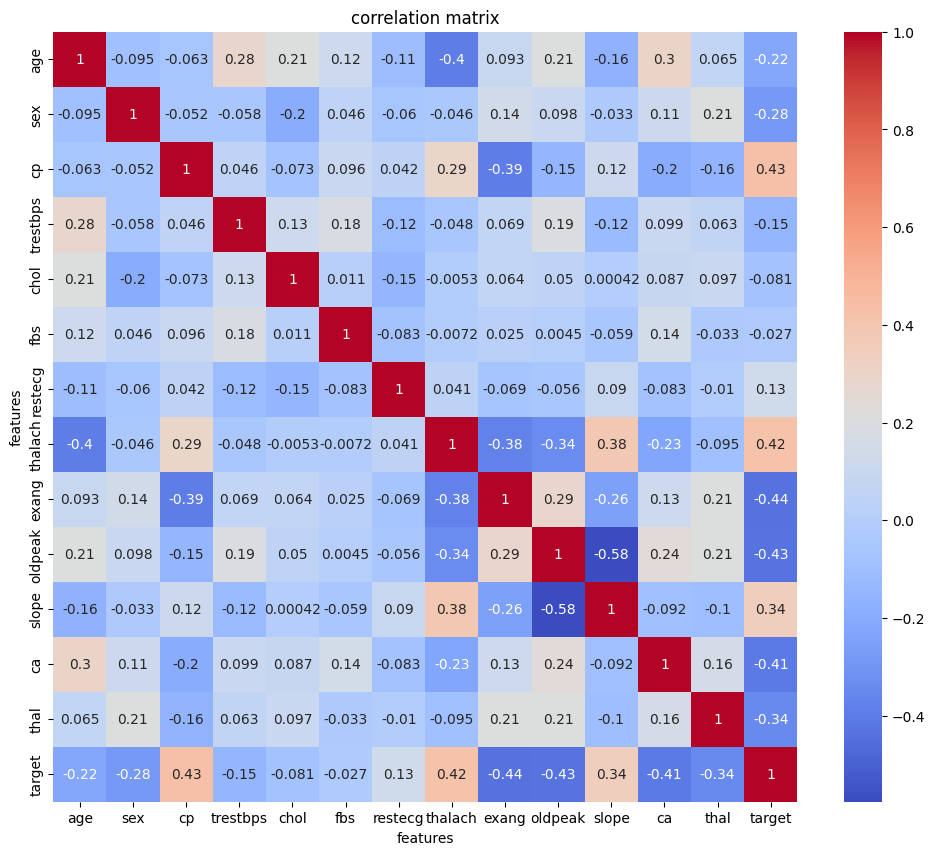

In [135]:
corr = dataset.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('correlation matrix')
plt.xlabel('features')
plt.ylabel('features')
plt.show()

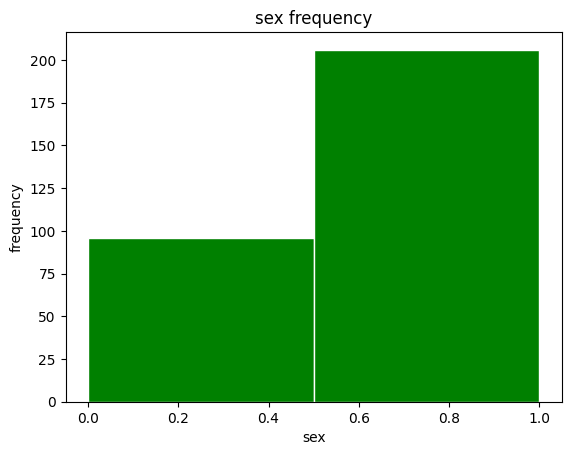

In [136]:
plt.hist(dataset['sex'],bins =2,edgecolor='white',color='green')
plt.xlabel('sex')
plt.ylabel('frequency')
plt.title('sex frequency')
plt.show()

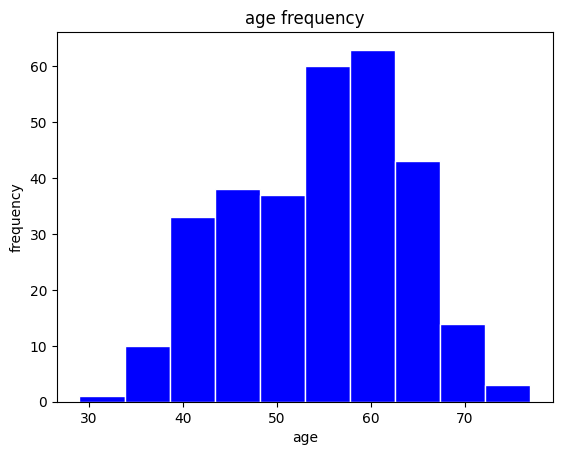

In [137]:
plt.hist(dataset['age'],edgecolor='white',color='blue')
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('age frequency')

plt.show()

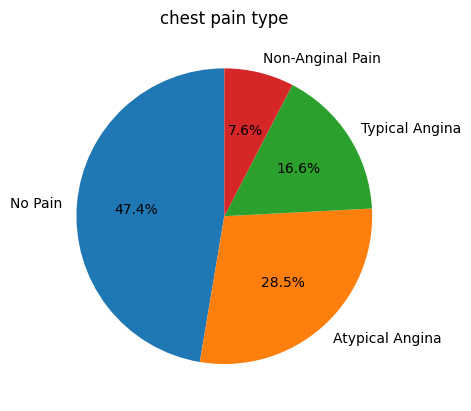

In [138]:
cpMapping = {
    0: "No Pain",
    1: "Typical Angina",              
    2: "Atypical Angina",            
    3: "Non-Anginal Pain" 
}
dataset['cp'] = dataset['cp'].replace(cpMapping)
chestPainType = dataset['cp'].value_counts()
plt.pie( chestPainType.values,labels=  chestPainType.index,autopct='%1.1f%%',startangle=90)
plt.title('chest pain type')
plt.show()

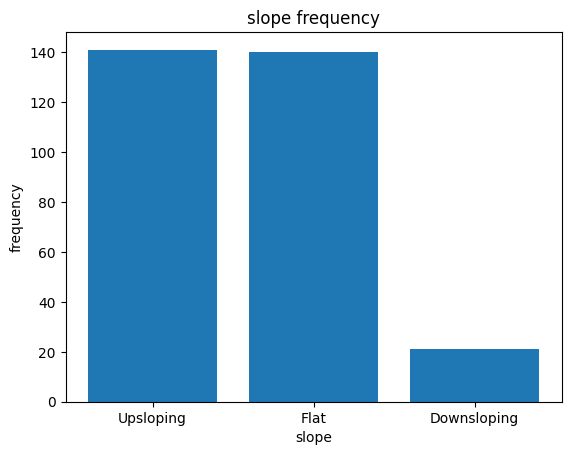

In [139]:
#Slope of the Peak Exercise ST Segment

slopeMapping = {
    0: "Downsloping",
    1: "Flat",              
    2: "Upsloping" 
}
dataset['slope'] = dataset['slope'].replace(slopeMapping)

slopeType = dataset['slope'].value_counts()

plt.bar(x=slopeType.index, height=slopeType.values)
plt.xlabel('slope')
plt.ylabel('frequency')
plt.title('slope frequency')
plt.show()

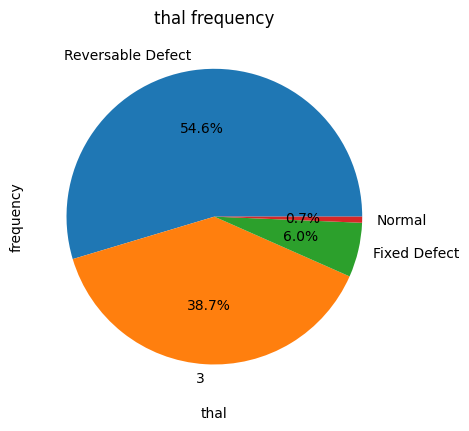

In [140]:
#Thalassemia is a blod flow 

thalMapping = {
    0: "Normal",
    1: "Fixed Defect",              
    2: "Reversable Defect"
}
dataset['thal'] = dataset['thal'].replace(thalMapping)

thalType = dataset['thal'].value_counts()
plt.pie(thalType.values,labels=  thalType.index,autopct='%0.1f%%')
plt.xlabel('thal')
plt.ylabel('frequency')
plt.title('thal frequency')
plt.show()

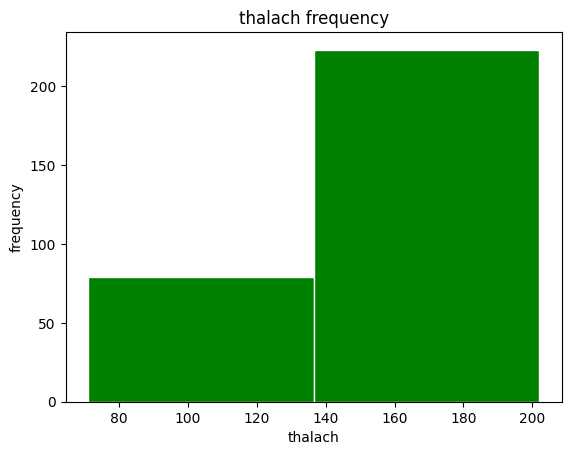

In [141]:
plt.hist(dataset['thalach'],bins =2,edgecolor='white',color='green')
plt.xlabel('thalach')
plt.ylabel('frequency')
plt.title('thalach frequency')
plt.show()

In [142]:
dataset = original_dataset


### feature scaling 

### importing needed machine learning libraries

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

## feature selection

#### 1 - Manually feature selection

In [144]:
included_features = ['cp','slope','thalach','restecg','ca','age','exang']


manually_x = original_dataset[included_features]
manually_y = original_dataset['target']


In [155]:
xm_train, xm_test, ym_train, ym_test = train_test_split(manually_x, manually_y, test_size=0.2,random_state=42,shuffle=True)

### accuracy evaluation 

In [156]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [157]:
def trainModel(model,x,y,x_test,y_test):
    model.fit(x,y)
    y_predict =  model.predict(x_test)
    acc = accuracy_score(y_test,y_predict)
    cm = confusion_matrix(y_test,y_predict)
    return acc , cm

C:\Users\KMR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KMR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


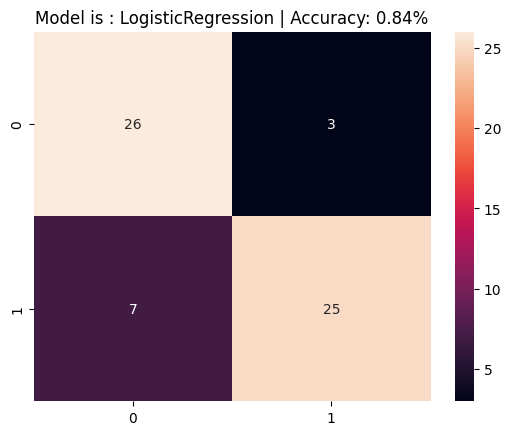

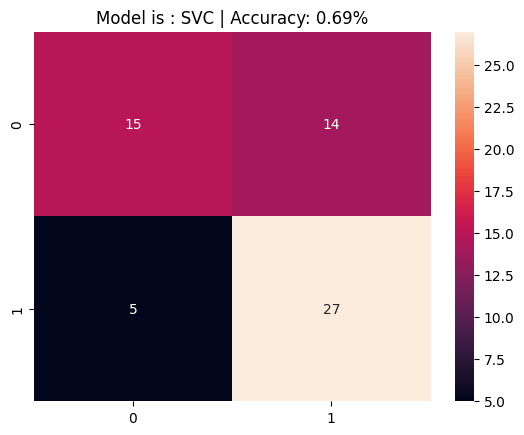

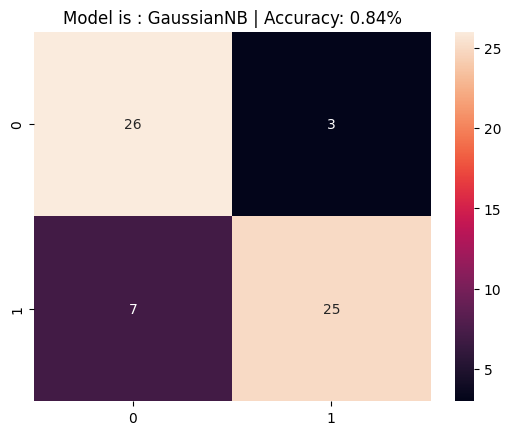

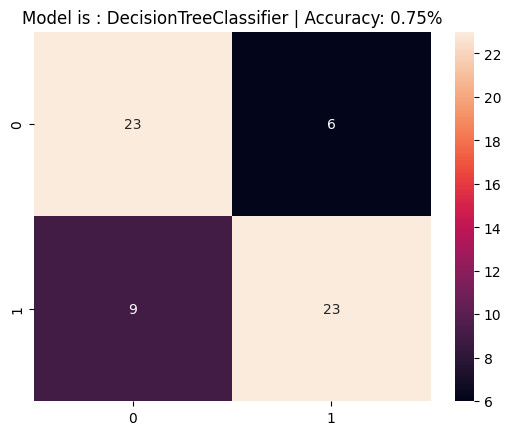

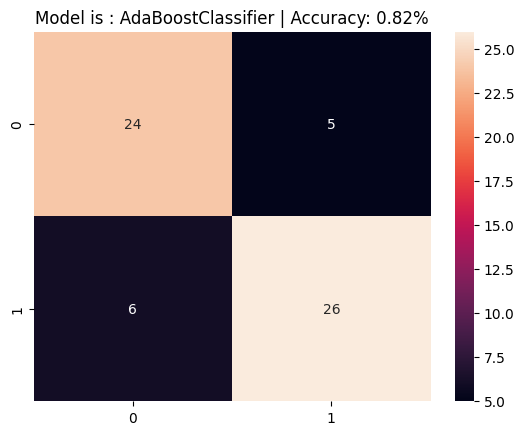

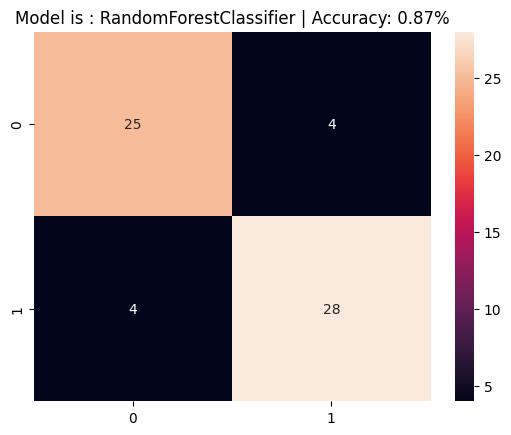

In [158]:
models = [
    LogisticRegression(),
    SVC(),
    GaussianNB(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier()
]

results = []

for model in models:
    acc, cm = trainModel(model, xm_train, ym_train, xm_test, ym_test)
    results.append((model.__class__.__name__, acc, cm))

for result in results:
    sns.heatmap(result[2],annot=True)
    plt.title(f'Model is : {result[0]} | Accuracy: {round(result[1],2)}%')
    plt.show()


### SAVING MODEL 

In [161]:
import joblib

joblib.dump(models[-1],'manual_model.pkl')


['manual_model.pkl']

In [ ]:
'cp','slope','thalach','restecg','ca','age','exang'

In [170]:
model = joblib.load('manual_model.pkl')
print(model.predict([[0,1,123,1,0,57,1]]))
print(model.predict([[3,0,150,1,0,63,0]]))
print(model.predict([[3,2,178,1,2,40,1]]))



[0]
[1]
[1]


C:\Users\KMR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\KMR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\KMR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
